In [62]:
from AWS_Services import aws_services
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import numpy as np

pd.set_option('display.max_columns', 150)

nltk.download('punkt')

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
aws = aws_services()

In [54]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]

In [6]:
year_start_train, month_start_train, year_end_train, month_end_train = 2007, 12, 2009, 12
df_train = aws.return_train_year_month_range_df(year_start_train, month_start_train, year_end_train, month_end_train)
print(df_train.shape)
df_train.head()


Extracting: 2007 2007-12
Extracting: 2008 2008-1
Extracting: 2008 2008-2
Extracting: 2008 2008-3
Extracting: 2008 2008-4
Extracting: 2008 2008-5
Extracting: 2008 2008-6
Extracting: 2008 2008-7
Extracting: 2008 2008-8
Extracting: 2008 2008-9
Extracting: 2008 2008-10
Extracting: 2008 2008-11
Extracting: 2008 2008-12
Extracting: 2009 2009-1
Extracting: 2009 2009-2
Extracting: 2009 2009-3
Extracting: 2009 2009-4
Extracting: 2009 2009-5
Extracting: 2009 2009-6
Extracting: 2009 2009-7
Extracting: 2009 2009-8
Extracting: 2009 2009-9
Extracting: 2009 2009-10
Extracting: 2009 2009-11
Extracting: 2009 2009-12
(1175, 144)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,issue_M,issue_Y,last_pymnt_M,last_pymnt_Y,charged_off
0,134737,5000.0,5000.0,2700.0,36 months,8.70%,158.31,B,B1,RGIS,< 1 year,RENT,28019.52,Not Verified,Does not meet the credit policy. Status:Charge...,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,Dream Wedding dress,323xx,FL,1.80,0.0,Apr-2005,720.0,724.0,2.0,0.0,0.0,2.0,0.0,827.0,51.7%,2.0,f,0.0,0.0,530.580000,286.50,244.8,71.56,0.0,214.22,2.1,158.30,Dec-2008,Oct-2016,554.0,550.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,10,2007,12,2007,1
1,122065,3000.0,3000.0,850.0,36 months,8.38%,94.54,A,A5,NaN,< 1 year,RENT,20000.00,Not Verified,Does not meet the credit policy. Status:Fully ...,n,https://lendingclub.com/browse/loanDetail.acti...,educational,College Loan,100xx,NY,6.72,0.0,Dec-1998,730.0,734.0,9.0,0.0,0.0,4.0,0.0,7021.0,27.4%,4.0,f,0.0,0.0,3080.747823,872.89,3000.0,80.75,0.0,0.00,0.0,2797.38,Jan-2008,May-2020,654.0,650.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,8,2007,12,2007,0
0,137106,4275.0,4275.0,525.0,36 months,10.28%,138.51,C,C1,NaN,< 1 year,OWN,31000.00,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Travel Resorts o

In [30]:
df_train.dtypes

id                   int64
loan_amnt          float64
funded_amnt        float64
funded_amnt_inv    float64
term                object
                    ...   
issue_M              int64
issue_Y              int64
last_pymnt_M         int64
last_pymnt_Y         int64
charged_off          int64
Length: 144, dtype: object

# Exploring categorical variables

Our target variable is loan_status. 

In [7]:
df_train["loan_status"].unique()

array(['Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid', 'Fully Paid',
       'Charged Off'], dtype=object)

However it looks like loan_status has already been recoded as the charged_off field.

Charged Off loans are equivalent to defaulted loans

In [10]:
pd.crosstab(df_train["charged_off"], df_train["loan_status"])

loan_status,Charged Off,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid
charged_off,,,,
0,0,0,177,423
1,273,302,0,0


There are some variables that we might expect to be populated only after the loan has been defaulted/charged off

e.g. the debt_settlement_flag

In [11]:
pd.crosstab(df_train["charged_off"], df_train["debt_settlement_flag"])

debt_settlement_flag,N,Y
charged_off,,
0,600,0
1,571,4


In [91]:
col_list = df_train.columns
print(len(col_list)) # 144 columns
for i in col_list:
    if df_train[i].dtypes == object:
        print(i, ": ", df_train[i].dtypes)

144
term :  object
grade :  object
sub_grade :  object
emp_title :  object
emp_length :  object
home_ownership :  object
verification_status :  object
loan_status :  object
pymnt_plan :  object
url :  object
purpose :  object
title :  object
zip_code :  object
addr_state :  object
earliest_cr_line :  object
initial_list_status :  object
next_pymnt_d :  object
last_credit_pull_d :  object
application_type :  object
hardship_flag :  object
debt_settlement_flag :  object


Some categorical variables are incorrectly coded e.g. int_rate and revol_util which is treated as a string when it should be a vector

<AxesSubplot:xlabel='revol_util', ylabel='Count'>

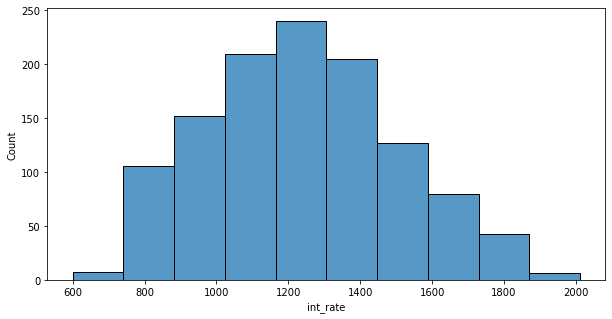

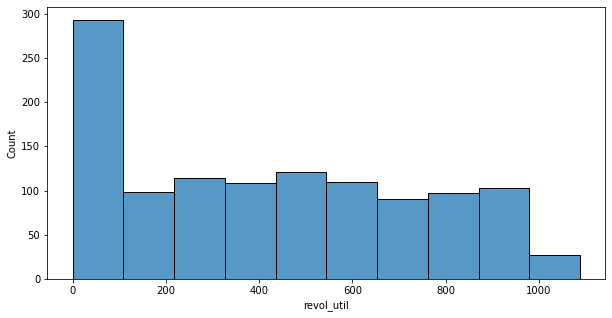

In [86]:
for char in spec_chars:
    if df_train["int_rate"].dtypes == object :
        df_train['int_rate'] = df_train['int_rate'].str.replace(char, '')
    
    if df_train["revol_util"].dtypes == object :
        df_train["revol_util"] = df_train['revol_util'].str.replace(char, '')
        
    df_train['emp_title'] = df_train['emp_title'].str.replace(char, '').replace(np.nan,'No job')

df_train["int_rate"] = df_train["int_rate"].astype("float64")
plt.figure()
sns.histplot(x=df_train['int_rate'], bins=10)

plt.figure()
df_train["revol_util"] = df_train["revol_util"].astype("float64")
sns.histplot(x=df_train['revol_util'], bins=10)



Some variables are temporal not categorical
* e.g. "earliest_cr_line", "next_pymnt_d", "last_credit_pull_d"


In [127]:
from datetime import datetime
# print(df_train["last_credit_pull_d"])
df_train.last_credit_pull_d = pd.to_datetime(df_train.last_credit_pull_d,format='%b-%Y')

# print(df_train["next_pymnt_d"])
df_train.next_pymnt_d =  pd.to_datetime(df_train.next_pymnt_d,format='%b-%Y')

#print(df_train["earliest_cr_line"])
df_train.earliest_cr_line = pd.to_datetime(df_train.earliest_cr_line,format='%b-%Y')
print(df_train.earliest_cr_line)

0     2005-04-01
1     1998-12-01
0     1991-11-01
1     1998-10-01
2     1987-12-01
         ...    
111   1997-10-01
112   1990-08-01
113   1998-07-01
114   2001-07-01
115   2000-06-01
Name: earliest_cr_line, Length: 1175, dtype: datetime64[ns]


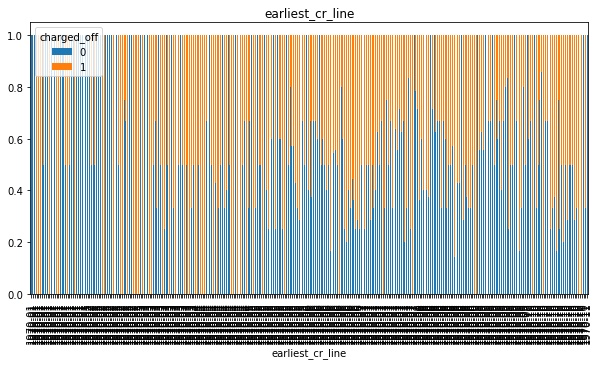

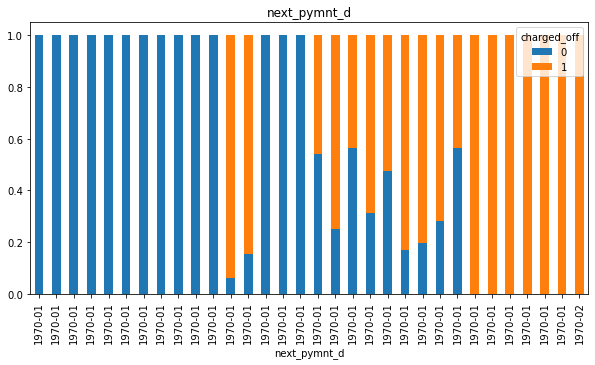

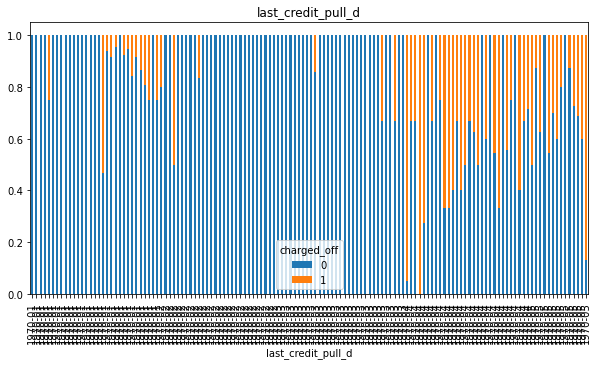

In [163]:
from matplotlib.dates import DateFormatter, MonthLocator,AutoDateFormatter
formatter = DateFormatter('%Y-%m')
#plt.gcf().axes[0].xaxis.set_major_formatter(formatter)

for i in ["earliest_cr_line", "next_pymnt_d", "last_credit_pull_d"]:
    tbl_of_comparison = pd.crosstab(df_train[i], df_train["charged_off"])
    prob_xt_pct = tbl_of_comparison.div(tbl_of_comparison.sum(1).astype(float), axis=0)
    ax=prob_xt_pct.plot(kind='bar', stacked=True, title=i)
    plt.xticks(rotation=90)
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    plt.show()

    

Some variables may enhance predictions but are not informative on their own: 

* e.g. zip_code, term (36months for all entries queried), pymnt_plan (same for all), "initial_list_status" (1 for all), "application_type" (same for all), "hardship_flag" (same for all)

Others are for context but unlikely to be useful for generalising:
* e.g. "title" - a descriptive field, "emp_title" - employer, may not repeat, "url" - specific to each case

Others only come into effect once the loan has been defaulted:
* e.g. "debt_settlement_flag

And finally, some categorical variables are temporal:


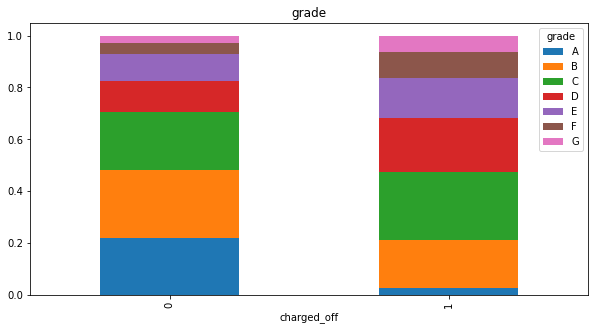

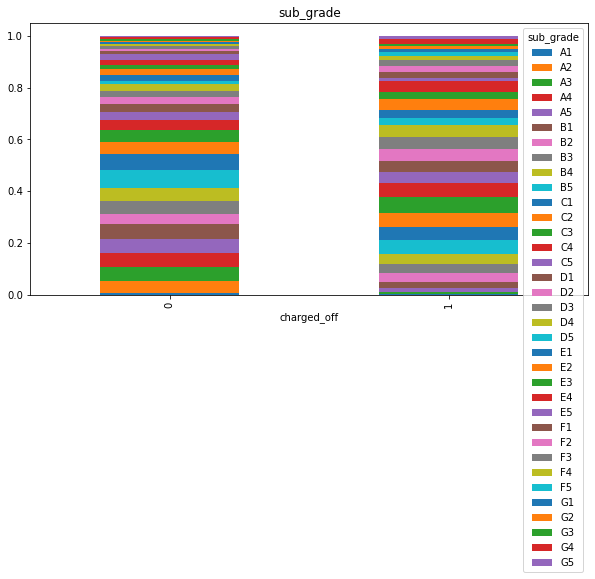

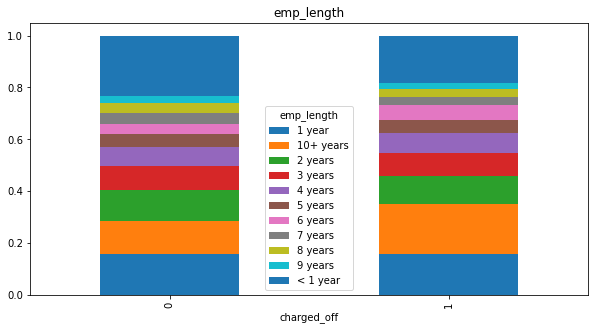

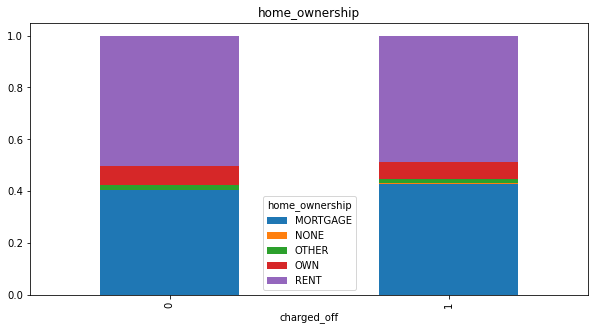

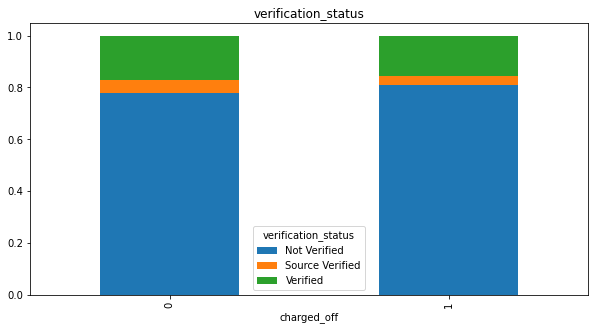

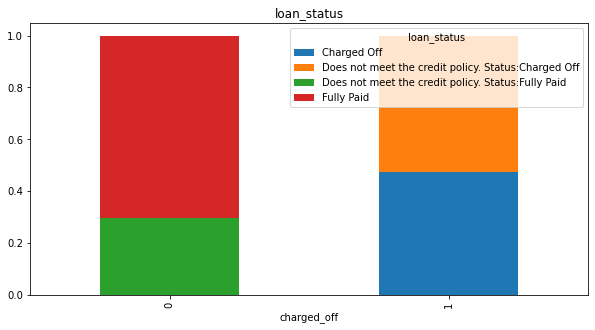

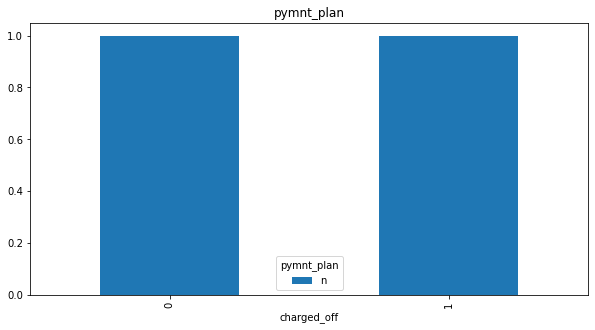

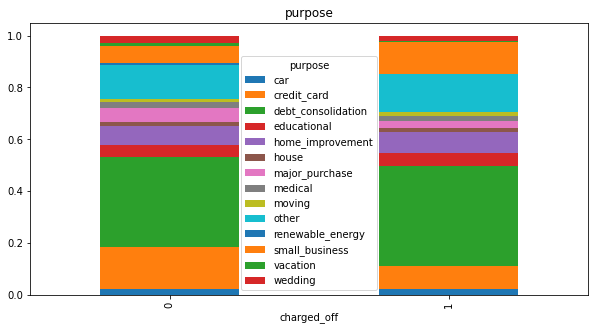

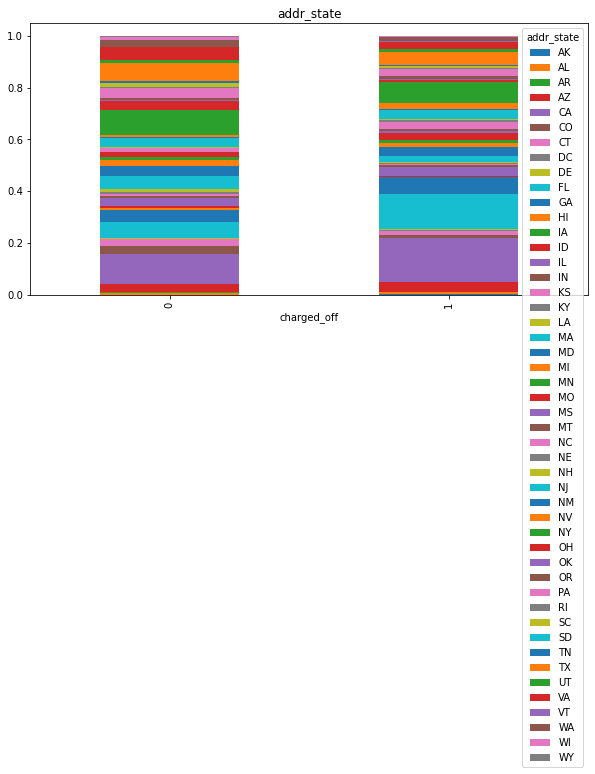

In [164]:
for i in col_list:
    if (df_train[i].dtypes) != int and (df_train[i].dtypes) != float:
        if i not in ["term", "emp_title", "title", "url", "debt_settlement_flag", "zip_code", "earliest_cr_line", "next_pymnt_d", "last_credit_pull_d", "application_type", "initial_list_status", "hardship_flag"]:
            tbl_of_comparison = pd.crosstab(df_train["charged_off"], df_train[i])
            prob_xt_pct = tbl_of_comparison.div(tbl_of_comparison.sum(1).astype(float), axis=0)
            prob_xt_pct.plot(kind='bar', stacked=True, title=i)


datetime.datetime(2016, 10, 1, 0, 0)